In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import json
import geopandas as gpd
from shapely.geometry import shape
import folium

import os


os.chdir("../Projet-CMI-Calcul-Num")

# Election présidentielle 2022 et variables socio-démographiques dans les Hauts-de-Seine

données :

- Données des élections présidentielles françaises de 2022.
- Variables socio demographiques par commune française
- Variables socio démographiques par département français

In [186]:
# Chargement des données

pres22 = pd.read_csv("../Projet-CMI-Calcul-Num/data/pres2022comm.csv", dtype={'codecommune': str, 'dep': str})
socio_demo = pd.read_csv("../Projet-CMI-Calcul-Num/data/var_socio_demo.csv", dtype={'codecommune': str, 'dep': str})
socio_dep = pd.read_csv("../Projet-CMI-Calcul-Num/data/var_socio_dep.csv", dtype={'codecommune': str, 'dep': str})



### Partie 1. Statistiques descriptives sur le département

In [187]:
socio_demo['dep'] = socio_demo['codecommune'].str[:2]  # On prend les 2 premiers caractères de 'codecommune'

# Filtrer les données pour le département 92 (Hauts-de-Seine)
socio_demo_92 = socio_demo[socio_demo['dep'] == '92']

# Afficher les premières lignes pour vérifier
print(socio_demo_92.head())

      codecommune  agri2022  indp2022  cadr2022  pint2022  empl2022  ouvr2022  \
37675       92002       7.0     886.0   10612.0    4932.0    3936.0    1213.0   
37676       92004       0.0    2019.0   16355.0    9079.0    7091.0    2684.0   
37677       92007       0.0     319.0    4126.0    3692.0    5168.0    2165.0   
37678       92009       0.0     529.0    5198.0    2602.0    1496.0     743.0   
37679       92012       0.0    3390.0   29835.0   11933.0    6421.0    2030.0   

       chom2022  aind2022  aica2022  ...  prop0142022  prop15392022  \
37675    1181.0     893.0   11505.0  ...     0.183927      0.298273   
37676    2849.0    2019.0   18374.0  ...     0.202484      0.353691   
37677    1525.0     319.0    4445.0  ...     0.223305      0.360327   
37678     421.0     529.0    5727.0  ...     0.180949      0.296967   
37679    3781.0    3390.0   33225.0  ...     0.170499      0.372423   

       prop40592022  prop60p2022  perpropf2022  perage2022  perprop0142022  \
37675   

In [188]:
# Statistiques descriptives pour le département 92
# Sélection des colonnes pertinentes pour les revenus, l'âge, le chômage et les niveaux de diplôme
columns_of_interest = ['revmoy2022', 'age2022', 'revtot2022', 'revmoyfoy2022', 'revmoyadu2022', 'pchom2022', 'pbac2022', 'psup2022']

# Statistiques descriptives du 92
stats_92 = socio_demo_92[columns_of_interest].describe()

# Afficher les statistiques descriptives pour le département 92
print("Statistiques descriptives pour le département 92 (Hauts-de-Seine):")
print(stats_92)

# Calculer les statistiques pour l'ensemble de la France (sans filtrer par département)
stats_france = socio_demo[columns_of_interest].describe()

# Afficher les statistiques pour la France
print("\nStatistiques descriptives pour l'ensemble de la France:")
print(stats_france)

# Comparaison entre les statistiques du 92 et celles de la France
# Comparer le revenu moyen du 92 avec celui de la France
mean_92 = socio_demo_92['revmoy2022'].mean()
mean_france = socio_demo['revmoy2022'].mean()

print("\nComparaison du revenu moyen:")
print(f"Revenu moyen du 92 : {mean_92:.2f}")
print(f"Revenu moyen de la France : {mean_france:.2f}")

# Comparer l'âge moyen du 92 avec celui de la France
mean_age_92 = socio_demo_92['age2022'].mean()
mean_age_france = socio_demo['age2022'].mean()

print(f"\nÂge moyen du 92 : {mean_age_92:.2f}")
print(f"Âge moyen de la France : {mean_age_france:.2f}")

# Comparaison des proportions : taux de chômage, proportion sans diplôme, avec bac, et études supérieures
mean_pchom_92 = socio_demo_92['pchom2022'].mean()
mean_pchom_france = socio_demo['pchom2022'].mean()

# Calculer la proportion de non-diplômés pour l'ensemble de la France
socio_demo['nodip_proportion'] = socio_demo['nodip2022'] / socio_demo['pop2022'] * 100
mean_nodip_france = socio_demo['nodip_proportion'].mean()

mean_pbaccalaureate_92 = socio_demo_92['pbac2022'].mean()
mean_pbaccalaureate_france = socio_demo['pbac2022'].mean()

mean_psup_92 = socio_demo_92['psup2022'].mean()
mean_psup_france = socio_demo['psup2022'].mean()

print("\nComparaison des proportions de chômeurs et niveaux de diplôme:")
print(f"Taux de chômage du 92 : {mean_pchom_92:.2f}%")
print(f"Taux de chômage de la France : {mean_pchom_france:.2f}%")

print(f"\nProportion de diplômés du bac du 92 : {mean_pbaccalaureate_92:.2f}")
print(f"Proportion de diplômés du bac de la France : {mean_pbaccalaureate_france:.2f}")

print(f"\nProportion de diplômés d'études supérieures du 92 : {mean_psup_92:.2f}")
print(f"Proportion de diplômés d'études supérieures de la France : {mean_psup_france:.2f}")


Statistiques descriptives pour le département 92 (Hauts-de-Seine):
         revmoy2022    age2022  revtot2022  revmoyfoy2022  revmoyadu2022  \
count     36.000000  36.000000   36.000000      36.000000      36.000000   
mean   31829.392556  39.341983    0.001105   56906.408444   42406.016389   
std    12457.508900   2.037881    0.000856   23462.478988   15972.159715   
min    12115.794000  34.678322    0.000078   23537.146000   17535.859000   
25%    24036.871750  38.030949    0.000544   44458.007250   32655.327000   
50%    30107.075500  39.290447    0.000762   53098.510000   39883.799000   
75%    36560.942250  40.555796    0.001398   62644.303500   48467.915750   
max    79357.602000  43.384209    0.003898  133021.660000  101324.200000   

       pchom2022   pbac2022   psup2022  
count  36.000000  36.000000  36.000000  
mean    0.074145   0.715922   0.590661  
std     0.019942   0.094854   0.113083  
min     0.039837   0.432541   0.243788  
25%     0.060496   0.684748   0.542584  
50

C:\Users\mailm\AppData\Local\Temp\ipykernel_10928\1650029417.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['92', 'France'])
C:\Users\mailm\AppData\Local\Temp\ipykernel_10928\1650029417.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['92', 'France'])


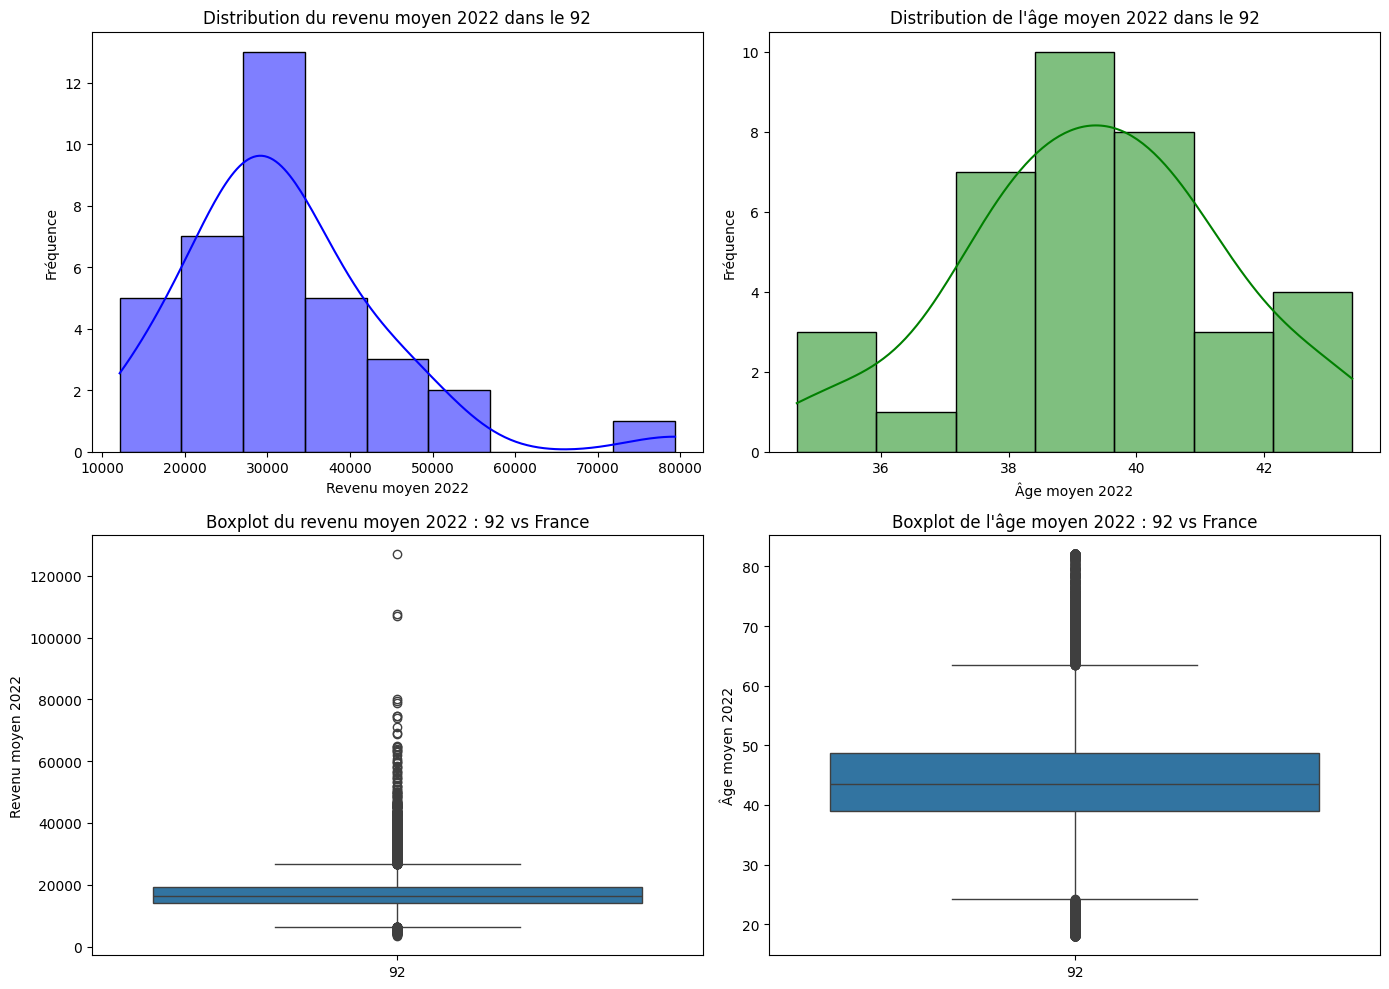

Revenu moyen du 92 : 31829.39
Revenu moyen de la France : 17051.48
Âge moyen du 92 : 39.34
Âge moyen de la France : 44.27


In [189]:
# graphiques



# Comparaison des moyennes pour la France et le département 92
mean_92 = socio_demo_92['revmoy2022'].mean()
mean_france = socio_demo['revmoy2022'].mean()
mean_age_92 = socio_demo_92['age2022'].mean()
mean_age_france = socio_demo['age2022'].mean()

# Création des graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Définir correctement les axes

# 1. Histogramme du revenu moyen 2022
sns.histplot(socio_demo_92['revmoy2022'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution du revenu moyen 2022 dans le 92')
axes[0, 0].set_xlabel('Revenu moyen 2022')
axes[0, 0].set_ylabel('Fréquence')

# 2. Histogramme de l'âge moyen 2022
sns.histplot(socio_demo_92['age2022'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution de l\'âge moyen 2022 dans le 92')
axes[0, 1].set_xlabel('Âge moyen 2022')
axes[0, 1].set_ylabel('Fréquence')

# 3. Boxplot comparatif du revenu moyen 2022 (92 vs France)
sns.boxplot(data=[socio_demo_92['revmoy2022'], socio_demo['revmoy2022']], ax=axes[1, 0])
axes[1, 0].set_xticklabels(['92', 'France'])
axes[1, 0].set_title('Boxplot du revenu moyen 2022 : 92 vs France')
axes[1, 0].set_ylabel('Revenu moyen 2022')

# 4. Boxplot comparatif de l'âge moyen 2022 (92 vs France)
sns.boxplot(data=[socio_demo_92['age2022'], socio_demo['age2022']], ax=axes[1, 1])
axes[1, 1].set_xticklabels(['92', 'France'])
axes[1, 1].set_title('Boxplot de l\'âge moyen 2022 : 92 vs France')
axes[1, 1].set_ylabel('Âge moyen 2022')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

# Afficher les moyennes pour comparer
print(f"Revenu moyen du 92 : {mean_92:.2f}")
print(f"Revenu moyen de la France : {mean_france:.2f}")
print(f"Âge moyen du 92 : {mean_age_92:.2f}")
print(f"Âge moyen de la France : {mean_age_france:.2f}")

### Partie 2. Statistiques Descriptives

statistiques descriptives sur les variables électorales du département : comment se répartissent les communes en matière de vote.

In [190]:
# Sous tableau des données électorales les plus importantes pour le 92
colonnes = ['dep', 'codecommune', 'nomcommune', 'ppar', 'pabs','pvoixMACRON', 'pvoixMLEPEN', 'pvoixMELENCHON', 'pvoixZEMMOUR', 'pvoixPECRESSE', 'pvoixJADOT']
sous_pres = pres22[colonnes]

# Filtrage département 92
sous_pres = sous_pres[sous_pres['dep'] == '92']

stats_descriptives2 = sous_pres.describe()
stats_descriptives2.to_latex('stats_descriptives2.tex')
stats_descriptives2

sous_pres




,dep,codecommune,nomcommune,ppar,pabs,pvoixMACRON,pvoixMLEPEN,pvoixMELENCHON,pvoixZEMMOUR,pvoixPECRESSE,pvoixJADOT
34560,92,92002,ANTONY,0.802006,0.197994,0.372916,0.087111,0.242963,0.069561,0.085471,0.069197
34561,92,92004,ASNIÈRES-SUR-SEINE,0.801340,0.198660,0.357949,0.066450,0.304244,0.072031,0.073926,0.065360
34562,92,92007,BAGNEUX,0.706978,0.293022,0.227999,0.098402,0.470644,0.047489,0.029736,0.040451
34563,92,92009,BOIS-COLOMBES,0.814302,0.185698,0.406568,0.075502,0.224444,0.071998,0.079005,0.075639
34564,92,92012,BOULOGNE-BILLANCOURT,0.811868,0.188132,0.456249,0.065218,0.158433,0.107016,0.105243,0.057457
34565,92,92014,BOURG-LA-REINE,0.820555,0.179445,0.371442,0.065812,0.243844,0.070938,0.093364,0.078902
34566,92,92019,CHÂTENAY-MALABRY,0.770088,0.229912,0.341381,0.102226,0.296388,0.058982,0.070011,0.057368
34567,92,92020,CHÂTILLON,0.811559,0.188441,0.364221,0.093228,0.260158,0.062415,0.068962,0.069074
34568,92,92022,CHAVILLE,0.820607,0.179393,0.388052,0.078900,0.218177,0.075449,0.088342,0.077356
34569,92,92023,CLAMART,0.786200,0.213800,0.348231,0.102396,0.250514,0.066137,0.085419,0.074077


In [191]:
# extraction des données électorales pour la ou les communes spécifiées
def extraire(df, codes_communes):
    if isinstance(codes_communes, (int, str)): 
        codes_communes = [codes_communes]
    result = df[df['codecommune'].astype(str).isin(map(str, codes_communes))]
    if result.empty:
        print("Aucun résultat trouvé pour les codes de commune fournis.")
    
    return result

extraire(sous_pres, [92002, 92073])

,dep,codecommune,nomcommune,ppar,pabs,pvoixMACRON,pvoixMLEPEN,pvoixMELENCHON,pvoixZEMMOUR,pvoixPECRESSE,pvoixJADOT
34560,92,92002,ANTONY,0.802006,0.197994,0.372916,0.087111,0.242963,0.069561,0.085471,0.069197
34591,92,92073,SURESNES,0.800957,0.199043,0.402804,0.091830,0.220876,0.081444,0.080319,0.063874


In [192]:
def min_max(df, variable):

    if variable not in df.columns:
        raise ValueError(f"La variable '{variable}' n'existe pas dans le DataFrame.")

    max = df.nlargest(5, variable)[['codecommune', 'nomcommune', variable]]
    
    min = df.nsmallest(5, variable)[['codecommune', 'nomcommune', variable]]
    
    return max, min

min_max(sous_pres, 'pvoixZEMMOUR')

(      codecommune          nomcommune  pvoixZEMMOUR
 34584       92051   NEUILLY-SUR-SEINE      0.187542
 34580       92047  MARNES-LA-COQUETTE      0.152336
 34578       92044    LEVALLOIS-PERRET      0.133114
 34588       92064         SAINT-CLOUD      0.129395
 34593       92076          VAUCRESSON      0.113673,
       codecommune             nomcommune  pvoixZEMMOUR
 34576       92036          GENNEVILLIERS      0.029046
 34595       92078  VILLENEUVE-LA-GARENNE      0.040347
 34583       92050               NANTERRE      0.043658
 34562       92007                BAGNEUX      0.047489
 34579       92046               MALAKOFF      0.050031)

Table de corrélation :
                revmoy2022  pvoixMACRON  pvoixMLEPEN  pvoixMELENCHON  \
revmoy2022        1.000000     0.838414    -0.529470       -0.834792   
pvoixMACRON       0.838414     1.000000    -0.459453       -0.978557   
pvoixMLEPEN      -0.529470    -0.459453     1.000000        0.352551   
pvoixMELENCHON   -0.834792    -0.978557     0.352551        1.000000   
pvoixZEMMOUR      0.930017     0.797800    -0.429052       -0.815059   
pvoixPECRESSE     0.912712     0.942798    -0.446755       -0.944899   
pvoixJADOT       -0.008275     0.360741    -0.202463       -0.383687   

                pvoixZEMMOUR  pvoixPECRESSE  pvoixJADOT  
revmoy2022          0.930017       0.912712   -0.008275  
pvoixMACRON         0.797800       0.942798    0.360741  
pvoixMLEPEN        -0.429052      -0.446755   -0.202463  
pvoixMELENCHON     -0.815059      -0.944899   -0.383687  
pvoixZEMMOUR        1.000000       0.888563   -0.133469  
pvoixPECRESSE       0.888563       1.000000    0.152

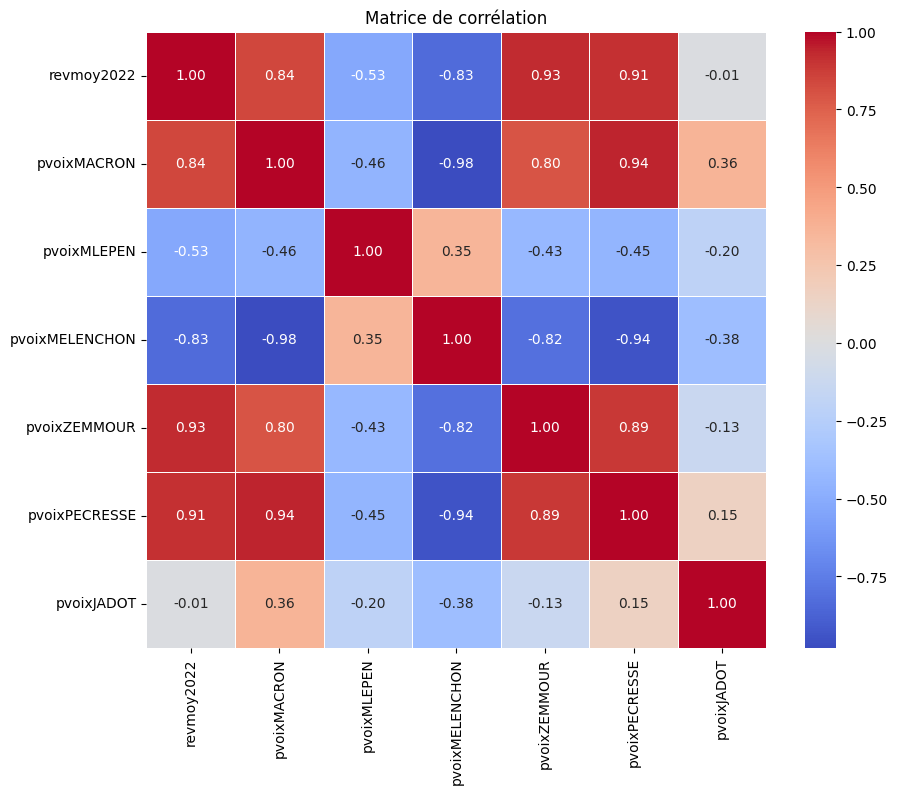

,revmoy2022,pvoixMACRON,pvoixMLEPEN,pvoixMELENCHON,pvoixZEMMOUR,pvoixPECRESSE,pvoixJADOT
revmoy2022,1.000000,0.838414,-0.529470,-0.834792,0.930017,0.912712,-0.008275
pvoixMACRON,0.838414,1.000000,-0.459453,-0.978557,0.797800,0.942798,0.360741
pvoixMLEPEN,-0.529470,-0.459453,1.000000,0.352551,-0.429052,-0.446755,-0.202463
pvoixMELENCHON,-0.834792,-0.978557,0.352551,1.000000,-0.815059,-0.944899,-0.383687
pvoixZEMMOUR,0.930017,0.797800,-0.429052,-0.815059,1.000000,0.888563,-0.133469
pvoixPECRESSE,0.912712,0.942798,-0.446755,-0.944899,0.888563,1.000000,0.152195
pvoixJADOT,-0.008275,0.360741,-0.202463,-0.383687,-0.133469,0.152195,1.000000


In [193]:
# table de corrélation

def table_correlation(df, colonnes):

    # Sélection des colonnes d'intérêt
    sous_df = df[colonnes]
    
    # Calcul de la matrice de corrélation
    correlation_matrix = sous_df.corr()
    
    # Affichage de la table de corrélation
    print("Table de corrélation :")
    print(correlation_matrix)
    
    # Représentation graphique (heatmap)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matrice de corrélation")
    plt.show()
    
    return correlation_matrix


df_mix = pd.merge(socio_demo_92, sous_pres, on='codecommune', how='inner')
col = ['revmoy2022', 'pvoixMACRON', 'pvoixMLEPEN', 'pvoixMELENCHON', 'pvoixZEMMOUR', 'pvoixPECRESSE', 'pvoixJADOT']

table_correlation(df_mix,col )

### Partie 3. Analyse en composante principale

Analyse en composante principale sur une sélection de variables. Identification de certaines communes représentatives ou extrêmes.

In [194]:
df_22_92 = pd.merge(sous_pres, socio_demo_92, on='codecommune')
df_22_92.columns = df_22_92.columns.str.replace(r'2022|22', '', regex=True)
#suprression des colonnes superflues
df_22_92 = df_22_92.loc[:, ~df_22_92.columns.str.startswith(('voix', 'vote', 'popf', 'poph'))]
df_22_92 = df_22_92.loc[:, ~df_22_92.columns.str.startswith(('agri', 'indp', 'cadr', 'pint', 'empl', 'ouvr', 'chom', 
                                                    'aind', 'aica', 'ouem', 'capi' ))]
df_22_92 = df_22_92.loc[:, ~df_22_92.columns.str.startswith(('nodiph', 'bach', 'suph', 'nodipf', 'bacf', 'supf', 'nodip', 'bac', 'sup' ))]

# Définition de deux listes de variables, l'une socio-démographique l'autre électorale
var_acp = 'codecommune', 'pimmigre', 'prop60p' , 'prop1539', 'prop014', 'ppropri', 'pbac', 'revmoy', 'paind', 'pouem', 'pcapi', 'pchom'
var_elec = 'codecommune', 'pabs', 'pvoixMACRON','pvoixMLEPEN', 'pvoixMELENCHON','pvoixZEMMOUR', 'pvoixPECRESSE','pvoixJADOT'

In [195]:
# ACP données socio démographiques

df_acp = df_22_92.loc[:,var_acp] # sélection des variables
df_acp.index = df_acp['codecommune'] # codes communes en nom des lignes
df_acp = df_acp.dropna() # suppression des NA
df_acp = df_acp.drop('codecommune', axis=1) # suppression du code commune en variable
df_acp

,pimmigre,prop60p,prop1539,prop014,ppropri,pbac,revmoy,paind,pouem,pcapi,pchom
codecommune,,,,,,,,,,,
92002,0.178383,0.261728,0.298273,0.183927,0.572929,0.747847,29752.549,0.041369,0.238534,0.720096,0.054711
92004,0.214307,0.185548,0.353691,0.202484,0.416748,0.693629,26708.063,0.054233,0.262571,0.683195,0.076528
92007,0.272531,0.163943,0.360327,0.223305,0.224672,0.581164,16342.950,0.020621,0.474014,0.505365,0.098578
92009,0.152743,0.226204,0.296967,0.180949,0.522588,0.734150,32633.941,0.050057,0.211866,0.738077,0.039837
92012,0.173080,0.201156,0.372423,0.170499,0.432169,0.837180,39806.086,0.063236,0.157641,0.779123,0.070529
92014,0.188557,0.245796,0.339569,0.171863,0.525264,0.816271,30286.957,0.033720,0.234170,0.732109,0.077682
92019,0.219622,0.220571,0.340661,0.177981,0.341475,0.683715,23337.422,0.047627,0.309413,0.642960,0.085391
92020,0.176368,0.182384,0.331218,0.204931,0.471461,0.715215,24143.797,0.043945,0.230579,0.725476,0.059400
92022,0.165020,0.208139,0.312322,0.178386,0.567777,0.712880,28872.068,0.029921,0.268088,0.701991,0.057012


In [196]:
df_acp_cr = StandardScaler().fit_transform(df_acp) #données centrées réduites

# ACP : 
acp = PCA()
acp_result = acp.fit_transform(df_acp_cr)

acp_result # Les coordonnées des communes sur les axes de l'ACP sont stockées dans pca_result

# Description des 3 premières composantes (axes) de l'ACP par les variables socio démographiques
feature_names = df_acp.columns

pd.DataFrame({"Noms des variables" : feature_names, "Composante 1" : acp.components_[0], 
              "Composante 2" : acp.components_[1], "Composante 3" : acp.components_[2]})

acp.explained_variance_ratio_[:3].sum()

np.float64(0.8356606585664393)

In [197]:
# Variance expliquées par les 3 premiers axes
acp.explained_variance_ratio_[:3].sum()

np.float64(0.8356606585664393)

In [198]:
variance_expliquee = acp.explained_variance_ratio_
variance_expliquee_cumulee = np.cumsum(variance_expliquee)
variance_expliquee

array([5.50669148e-01, 1.95239598e-01, 8.97519126e-02, 6.98589258e-02,
       4.39572615e-02, 1.79163024e-02, 1.34829969e-02, 8.65794116e-03,
       6.57271578e-03, 3.89319782e-03, 1.51422964e-15])

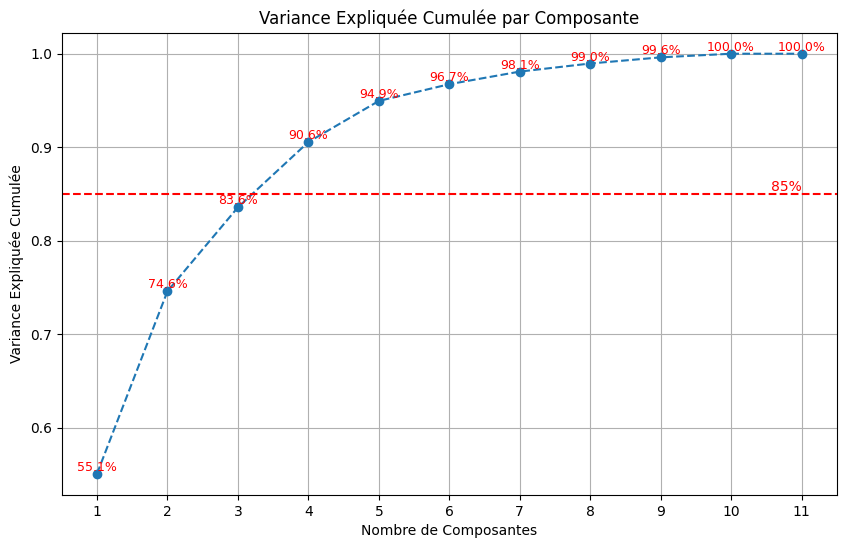

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_expliquee_cumulee) + 1), variance_expliquee_cumulee, marker='o', linestyle='--')
plt.title('Variance Expliquée Cumulée par Composante')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.axhline(y=0.85, color='r', linestyle='--')  # Ligne rouge à y=0.85 pour visualiser 85% de variance expliquée
plt.text(len(variance_expliquee_cumulee), 0.85, '85%', color='red', verticalalignment='bottom', horizontalalignment='right')

# Ajouter les pourcentages au-dessus de chaque point
for i, value in enumerate(variance_expliquee_cumulee):
    plt.text(i + 1, value, f"{value*100:.1f}%", ha='center', va='bottom', fontsize=9, color='red')

plt.xticks(range(1, len(variance_expliquee_cumulee) + 1))
plt.grid()
plt.show()


In [200]:
# Transformation en DataFrame pandas pour faciliter les manipulation et afficher les résultats
acp_result_df = pd.DataFrame({
    "Commune" : df_acp.index,
    "Dim1" : acp_result[:,0], 
    "Dim2" : acp_result[:,1],
    "Dim3" : acp_result[:,2]
})

# Résultat (premières lignes)
acp_result_df

,Commune,Dim1,Dim2,Dim3
0,92002,-1.305948,0.193207,1.505940
1,92004,0.998346,0.494274,-0.908099
2,92007,5.088244,-0.082486,-0.321131
3,92009,-1.588228,0.830394,0.924100
4,92012,-1.549733,1.519791,-1.489035
5,92014,-0.943841,0.807703,0.610110
6,92019,1.239498,0.412347,0.119333
7,92020,0.172850,0.948322,-0.179367
8,92022,-0.499500,0.886145,1.101360
9,92023,-0.448745,-0.664487,1.110307


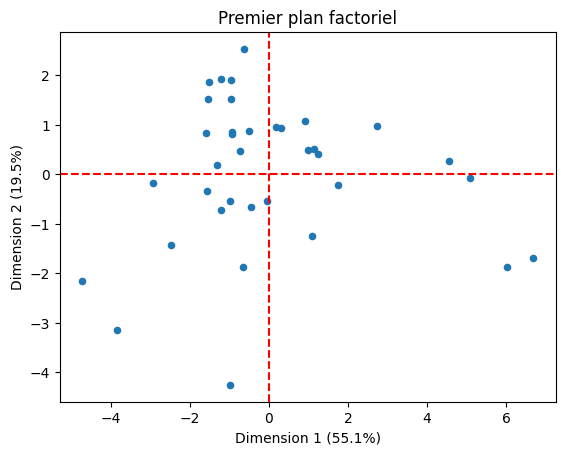

In [201]:
acp_result_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.axvline(x=0, color='r', linestyle='--') # lignes pour les axes x et y
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dimension 1 (55.1%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (19.5%)") # idem pour l'axe Y
plt.title("Premier plan factoriel") # titre général
plt.show()

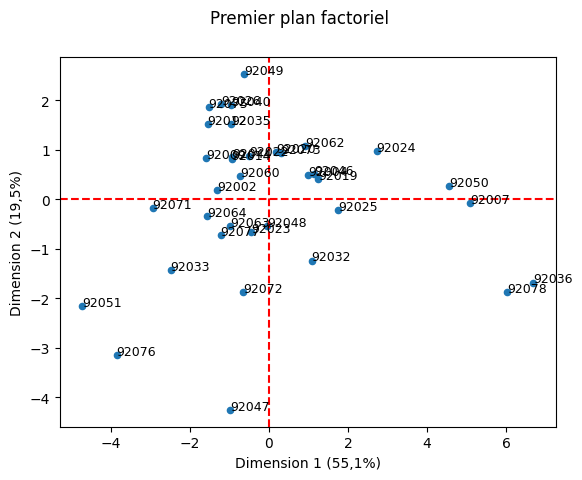

In [202]:
fig, ax = plt.subplots()
acp_result_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque commune
for k in acp_result_df.iterrows():
    ax.annotate(k[1]["Commune"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9) 
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dimension 1 (55,1%)")
plt.ylabel("Dimension 2 (19,5%)") 
plt.suptitle("Premier plan factoriel")
plt.show()

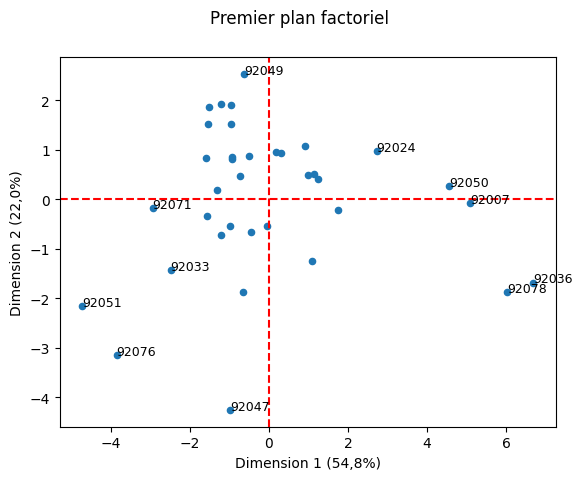

In [203]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
acp_result_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in acp_result_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 2) | (abs(k[1]['Dim2']) > 2):
        ax.annotate(k[1]["Commune"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dimension 1 (54,8%)")
plt.ylabel("Dimension 2 (22,0%)") 
plt.suptitle("Premier plan factoriel")
plt.show()

In [204]:
n = acp_result.shape[0] # nb individus
p = acp_result.shape[1] # nb variables
eigval = (n-1) / n * acp.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': df_acp.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,pimmigre,0.878997,-0.032267
1,prop60p,-0.626426,-0.379464
2,prop1539,0.488431,0.703949
3,prop014,0.574174,-0.540911
4,ppropri,-0.783129,-0.349067
5,pbac,-0.912209,0.152986
6,revmoy,-0.817041,-0.355066
7,paind,-0.585370,-0.508001
8,pouem,0.921592,-0.286890
9,pcapi,-0.869038,0.418247


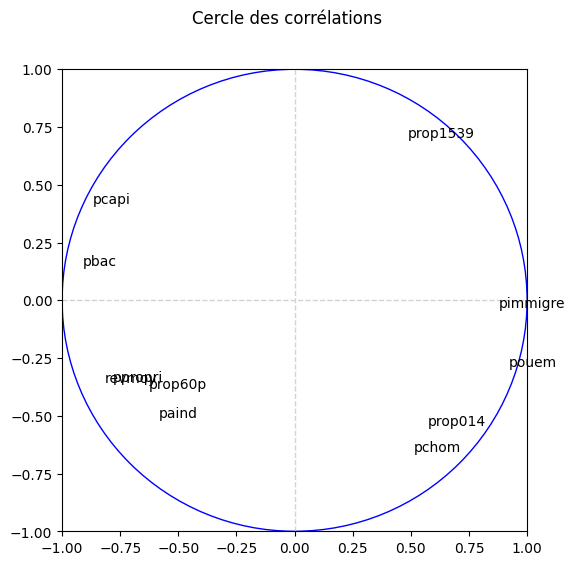

In [205]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

In [206]:
# Communes d'intérêts : grandes villes et points extrêmes dans l'ACP
extraire(sous_pres, [92047, 92049, 92036, 92051, 92007, 92060, 92012, 92062, 92050])

,dep,codecommune,nomcommune,ppar,pabs,pvoixMACRON,pvoixMLEPEN,pvoixMELENCHON,pvoixZEMMOUR,pvoixPECRESSE,pvoixJADOT
34562,92,92007,BAGNEUX,0.706978,0.293022,0.227999,0.098402,0.470644,0.047489,0.029736,0.040451
34564,92,92012,BOULOGNE-BILLANCOURT,0.811868,0.188132,0.456249,0.065218,0.158433,0.107016,0.105243,0.057457
34576,92,92036,GENNEVILLIERS,0.723617,0.276383,0.154255,0.086541,0.610746,0.029046,0.019723,0.022472
34580,92,92047,MARNES-LA-COQUETTE,0.856345,0.143655,0.459813,0.064486,0.106542,0.152336,0.130841,0.043925
34582,92,92049,MONTROUGE,0.822618,0.177382,0.352224,0.075407,0.283912,0.062280,0.062365,0.082926
34583,92,92050,NANTERRE,0.733671,0.266329,0.243647,0.093848,0.470446,0.043658,0.032956,0.044290
34584,92,92051,NEUILLY-SUR-SEINE,0.836905,0.163095,0.489817,0.056787,0.055243,0.187542,0.151379,0.029986
34585,92,92060,LE PLESSIS-ROBINSON,0.804199,0.195801,0.347110,0.141773,0.213380,0.083050,0.082069,0.053884
34586,92,92062,PUTEAUX,0.810352,0.189648,0.376029,0.108595,0.226391,0.086918,0.074651,0.058394


### Partie 4. Classification ascendante hiérarchique (clustering)

Partition des communes. Regroupements homogènes selon les variables socio-démographiques puis descriptions par les données électorales. Identification des relations entre les comportement électoraux et les caractéristiques socio-démographiques de la commune. Structure du vote dans le département.

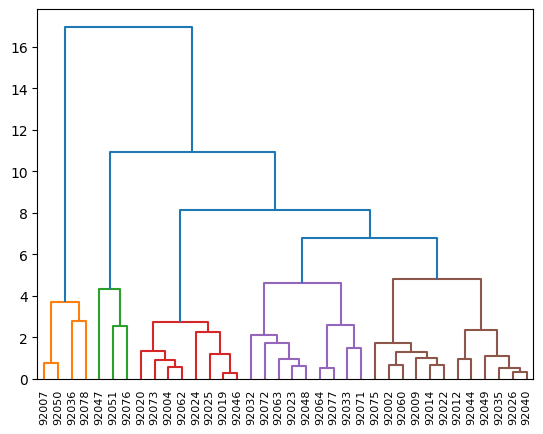

In [207]:
acp_result_df.index = acp_result_df['Commune']

Z = linkage(acp_result_df.iloc[:,1:4], 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=acp_result_df.index, color_threshold=6)

# Show the graph
plt.show()

In [208]:
groupes_cah = fcluster(Z,t=6,criterion='distance')
groupes_cah


array([5, 3, 1, 5, 5, 5, 3, 3, 5, 4, 3, 3, 5, 4, 4, 5, 1, 5, 5, 3, 2, 4,
       5, 1, 2, 5, 3, 4, 4, 4, 4, 3, 5, 2, 4, 1], dtype=int32)

In [209]:
df_cah = pd.merge(df_22_92.loc[:, var_acp], df_22_92.loc[:,var_elec], on='codecommune', how='outer')
df_cah = df_cah.dropna()
df_cah = pd.merge(df_cah , acp_result_df, left_on='codecommune', right_index=True,  how= 'outer')
df_cah['cluster']= groupes_cah
df_cah

,codecommune,pimmigre,prop60p,prop1539,prop014,ppropri,pbac,revmoy,paind,pouem,...,pvoixMLEPEN,pvoixMELENCHON,pvoixZEMMOUR,pvoixPECRESSE,pvoixJADOT,Commune,Dim1,Dim2,Dim3,cluster
0,92002,0.178383,0.261728,0.298273,0.183927,0.572929,0.747847,29752.549,0.041369,0.238534,...,0.087111,0.242963,0.069561,0.085471,0.069197,92002,-1.305948,0.193207,1.505940,5
1,92004,0.214307,0.185548,0.353691,0.202484,0.416748,0.693629,26708.063,0.054233,0.262571,...,0.066450,0.304244,0.072031,0.073926,0.065360,92004,0.998346,0.494274,-0.908099,3
2,92007,0.272531,0.163943,0.360327,0.223305,0.224672,0.581164,16342.950,0.020621,0.474014,...,0.098402,0.470644,0.047489,0.029736,0.040451,92007,5.088244,-0.082486,-0.321131,1
3,92009,0.152743,0.226204,0.296967,0.180949,0.522588,0.734150,32633.941,0.050057,0.211866,...,0.075502,0.224444,0.071998,0.079005,0.075639,92009,-1.588228,0.830394,0.924100,5
4,92012,0.173080,0.201156,0.372423,0.170499,0.432169,0.837180,39806.086,0.063236,0.157641,...,0.065218,0.158433,0.107016,0.105243,0.057457,92012,-1.549733,1.519791,-1.489035,5
5,92014,0.188557,0.245796,0.339569,0.171863,0.525264,0.816271,30286.957,0.033720,0.234170,...,0.065812,0.243844,0.070938,0.093364,0.078902,92014,-0.943841,0.807703,0.610110,5
6,92019,0.219622,0.220571,0.340661,0.177981,0.341475,0.683715,23337.422,0.047627,0.309413,...,0.102226,0.296388,0.058982,0.070011,0.057368,92019,1.239498,0.412347,0.119333,3
7,92020,0.176368,0.182384,0.331218,0.204931,0.471461,0.715215,24143.797,0.043945,0.230579,...,0.093228,0.260158,0.062415,0.068962,0.069074,92020,0.172850,0.948322,-0.179367,3
8,92022,0.165020,0.208139,0.312322,0.178386,0.567777,0.712880,28872.068,0.029921,0.268088,...,0.078900,0.218177,0.075449,0.088342,0.077356,92022,-0.499500,0.886145,1.101360,5
9,92023,0.175426,0.244782,0.291886,0.183921,0.550381,0.672334,28413.953,0.059240,0.293981,...,0.102396,0.250514,0.066137,0.085419,0.074077,92023,-0.448745,-0.664487,1.110307,4


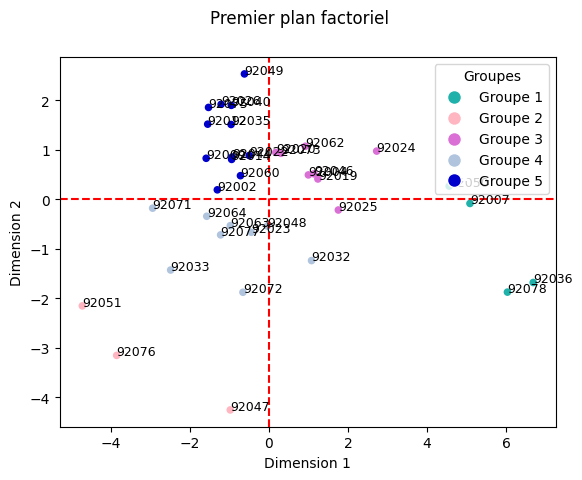

In [210]:
color_mapping = {1: 'lightseagreen', 2: 'lightpink', 3: 'orchid', 4: 'lightsteelblue', 5: 'mediumblue'}
df_cah['color'] = df_cah['cluster'].map(color_mapping).fillna('gray')


fig, ax = plt.subplots()
df_cah.plot.scatter("Dim1", "Dim2", ax = ax, c=df_cah['color'])

for k in df_cah.iterrows():
    ax.annotate(k[1]["Commune"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("Premier plan factoriel")

legend_labels = ['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_mapping.values()]
ax.legend(handles, legend_labels, title='Groupes', loc='upper right')

plt.show()



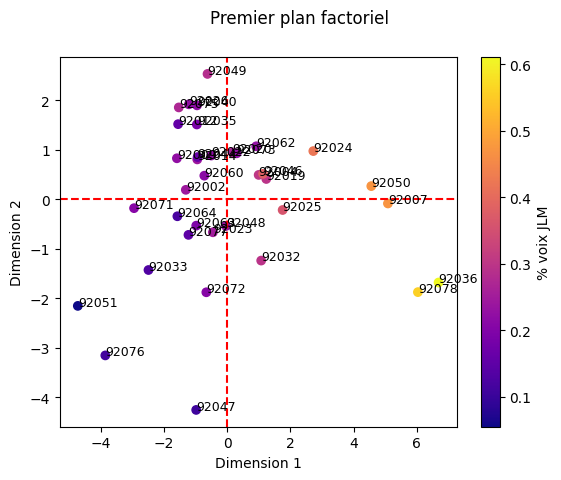

In [211]:
fig, ax = plt.subplots()
scatter = ax.scatter(df_cah["Dim1"], df_cah["Dim2"], c=df_cah['pvoixMELENCHON'], cmap='plasma')


for k in df_cah.iterrows():
    ax.annotate(k[1]["Commune"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)

plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.suptitle("Premier plan factoriel")

plt.colorbar(scatter, label="% voix JLM")

plt.show()

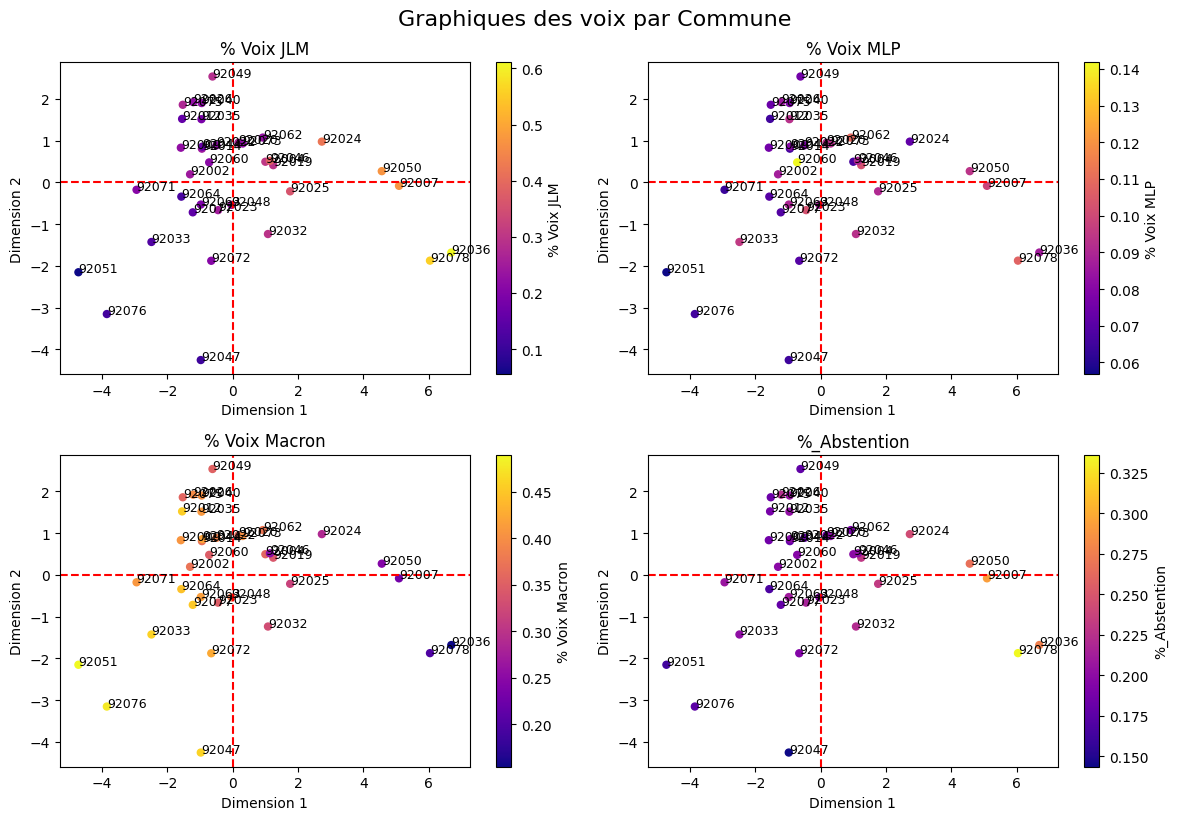

In [212]:
variables = ['pvoixMELENCHON', 'pvoixMLEPEN', 'pvoixMACRON', 'pabs']
titles = ['% Voix JLM', '% Voix MLP', '% Voix Macron', "%_Abstention"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 lignes, 2 colonnes

for ax, var, title in zip(axs.flatten(), variables, titles):
    scatter = ax.scatter(df_cah["Dim1"], df_cah["Dim2"], c=df_cah[var], cmap='plasma', s=25)
    for k in df_cah.iterrows():
        ax.annotate(k[1]["Commune"], (k[1]['Dim1'], k[1]['Dim2']), fontsize=9)

    ax.axvline(x=0, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_title(title)
    plt.colorbar(scatter, ax=ax, label=title)

# Ajustement des espaces entre les sous-graphes
plt.tight_layout()
plt.suptitle("Graphiques des voix par Commune", fontsize=16, y=1.02)
plt.show()

In [213]:
cluster_sociodemo = df_cah.groupby('cluster')[[ 'pimmigre', 'prop60p' , 'prop1539', 'prop014', 'ppropri', 'pbac', 'revmoy', 'paind', 'pouem', 'pcapi', 'pchom']].mean().reset_index()
cluster_sociodemo 
# il est possible de créer une heatmap à partir de ce dataframe. Il faut d'abord centrer réduire les variables 


,cluster,pimmigre,prop60p,prop1539,prop014,ppropri,pbac,revmoy,paind,pouem,pcapi,pchom
0,1,0.287658,0.178323,0.349608,0.219330,0.218883,0.501831,15026.460250,0.033520,0.514099,0.452382,0.102664
1,2,0.150457,0.260161,0.249073,0.200104,0.642850,0.819497,59758.725333,0.099037,0.184113,0.716850,0.100227
2,3,0.213619,0.189207,0.343908,0.192029,0.367334,0.692007,24961.439000,0.051465,0.286988,0.661546,0.074782
3,4,0.168395,0.237549,0.282764,0.189065,0.516253,0.733583,36342.013333,0.062687,0.259692,0.677621,0.071674
4,5,0.161829,0.221673,0.334800,0.175075,0.458332,0.764090,31642.206917,0.043496,0.208416,0.748088,0.059545


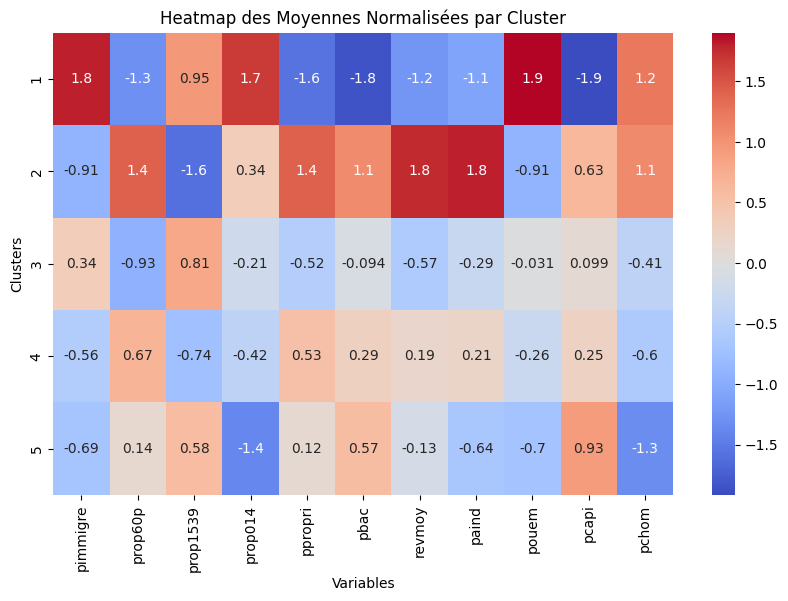

In [214]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_sociodemo.iloc[:, 1:])  # Ne pas inclure 'cluster'
normalized_df = pd.DataFrame(normalized_data, columns=cluster_sociodemo.columns[1:], index=cluster_sociodemo['cluster'])

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, cmap='coolwarm', center=0)  # 'coolwarm' est une palette de couleurs
plt.title('Heatmap des Moyennes Normalisées par Cluster')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.show()

# les coefficients ne sont plus interprétables facilement, ils correspondent à des écarts à la moyenne corrigés de la variance


In [215]:
cluster_vote = df_cah.groupby('cluster')[['pabs', 'pvoixMLEPEN', 'pvoixMACRON', 'pvoixMELENCHON', 'pvoixJADOT' ]].mean().reset_index()
cluster_vote

,cluster,pabs,pvoixMLEPEN,pvoixMACRON,pvoixMELENCHON,pvoixJADOT
0,1,0.292970,0.096586,0.206036,0.527186,0.030597
1,2,0.160467,0.062269,0.475861,0.091347,0.043785
2,3,0.210180,0.089364,0.337451,0.308951,0.063693
3,4,0.198774,0.082064,0.406764,0.198415,0.069009
4,5,0.192819,0.083281,0.389598,0.220887,0.068189


<Figure size 400x400 with 0 Axes>

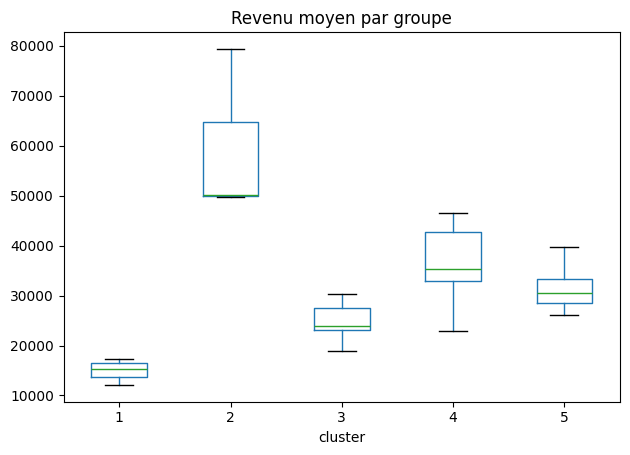

In [216]:
# Création de la figure
plt.figure(figsize=(4, 4))  # Ajustement de la taille de la figure

# Boxplot pour la variable choisie
df_cah.boxplot(column='revmoy', by='cluster', grid=False)
# Configuration du titre et des labels
plt.title('Revenu moyen par groupe')
plt.suptitle('')  # Enlève le titre par défaut

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

<Figure size 400x400 with 0 Axes>

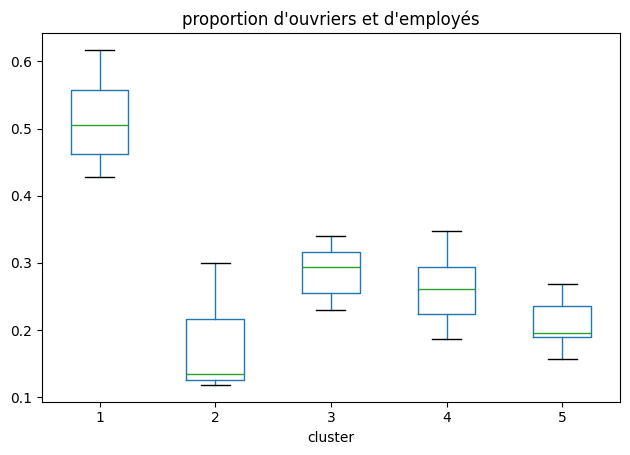

In [217]:
# Fonction graphique / clusters et variables
def cluster_graph(var, title) :
    plt.figure(figsize=(4, 4))
    df_cah.boxplot(column=var, by='cluster', grid=False)
    plt.title(title)
    plt.suptitle('')
    plt.tight_layout()
    plt.savefig(f'{var}.png', dpi=300, bbox_inches='tight')  # Export en PNG avec une résolution de 300 dpi
    plt.show()
cluster_graph('pouem', "proportion d'ouvriers et d'employés")

<Figure size 400x400 with 0 Axes>

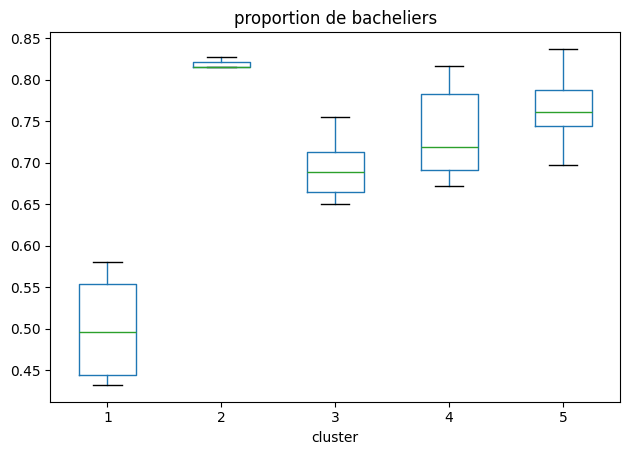

In [218]:
cluster_graph('pbac', "proportion de bacheliers")

<Figure size 400x400 with 0 Axes>

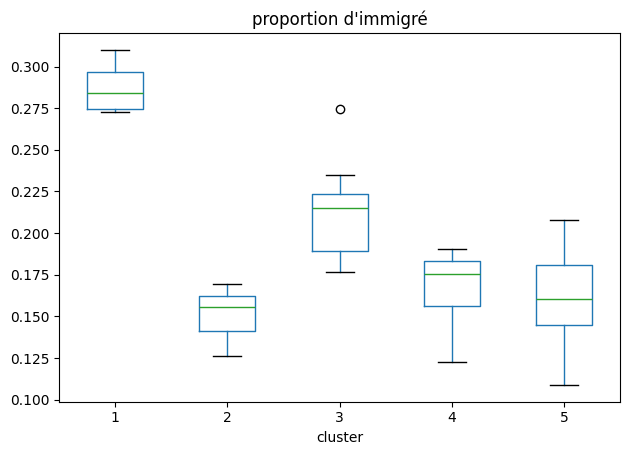

In [219]:
cluster_graph('pimmigre', "proportion d'immigré")

<Figure size 400x400 with 0 Axes>

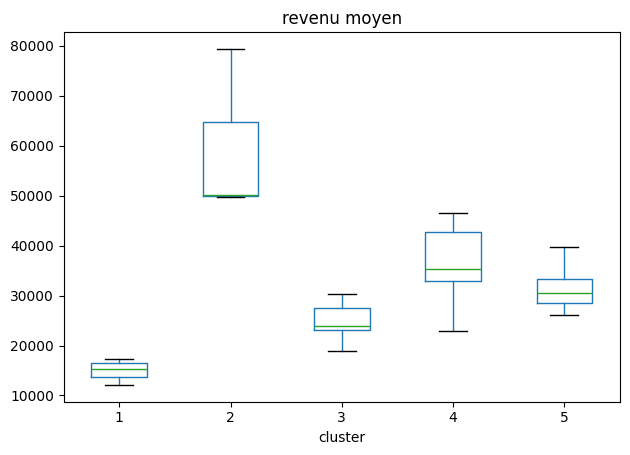

In [220]:
cluster_graph('revmoy', "revenu moyen")

<Figure size 400x400 with 0 Axes>

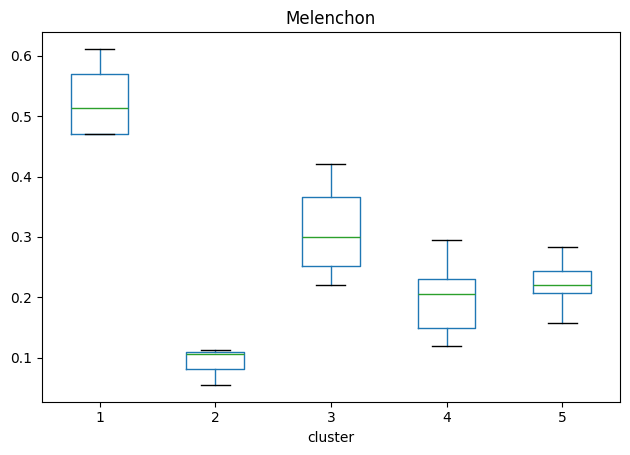

<Figure size 400x400 with 0 Axes>

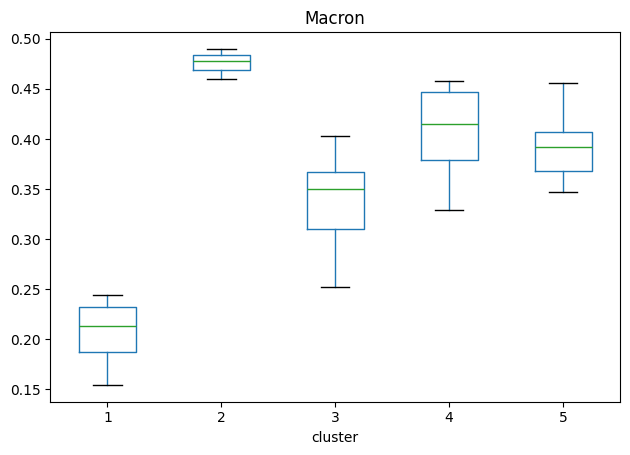

<Figure size 400x400 with 0 Axes>

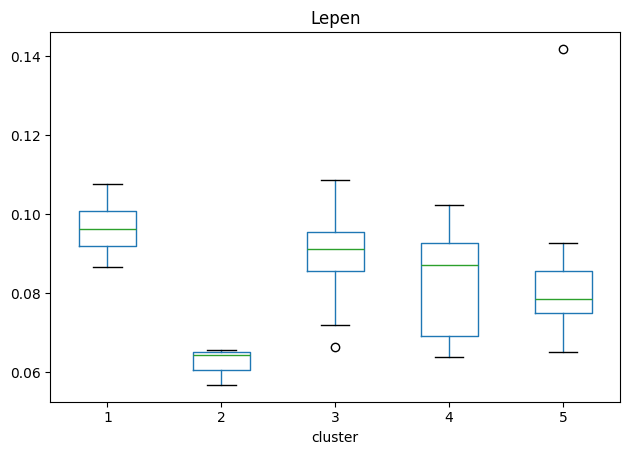

<Figure size 400x400 with 0 Axes>

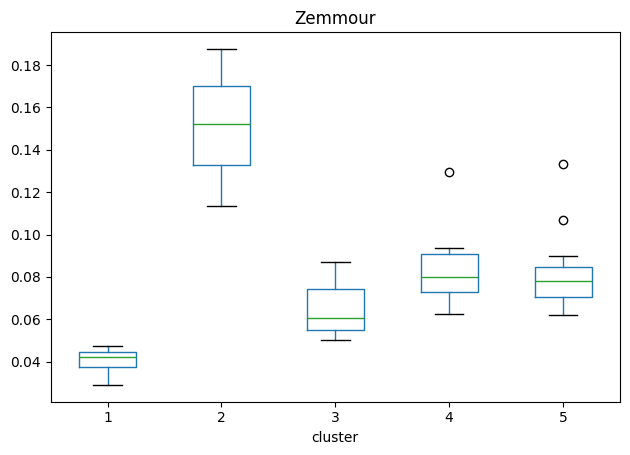

<Figure size 400x400 with 0 Axes>

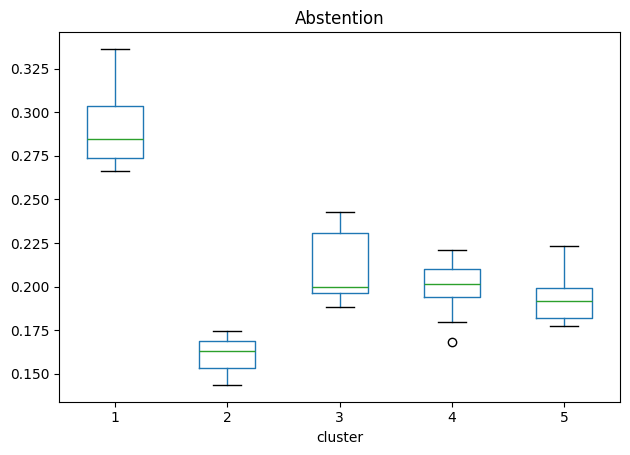

In [221]:
cluster_graph('pvoixMELENCHON', "Melenchon")
cluster_graph('pvoixMACRON', "Macron")
cluster_graph('pvoixMLEPEN', "Lepen")
cluster_graph('pvoixZEMMOUR', "Zemmour")
cluster_graph('pabs', 'Abstention')

### Partie 5. Représentation géographique

In [ ]:
geo = json.load(open("./data/communes92.geojson"))
geo.keys() 
geo['features']
geo['features'][5]['properties']


NameError: name 'folium' is not defined

In [232]:
hauts_de_seine = folium.Map(location= [48.85 , 2.3], zoom_start = 11) # longitude et latitude de la savoie
folium.Choropleth(geo_data = geo).add_to(hauts_de_seine)
hauts_de_seine

In [233]:
hauts_de_seine = folium.Map(location= [48.85 , 2.3], zoom_start = 11)


folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_cah,
    columns=["codecommune", "Dim1"], #représente la première composante en légende
    key_on="feature.properties.code",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Première composante",
).add_to(hauts_de_seine)

hauts_de_seine

In [234]:
hauts_de_seine = folium.Map(location= [48.85 , 2.3], zoom_start = 11)


folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_cah,
    columns=["codecommune", "cluster"],
    key_on="feature.properties.code",
    fill_color="Set2", # échelles discrètes
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Cluster",
).add_to(hauts_de_seine)

hauts_de_seine

In [ ]:
import plotly.express as px 

# Carte interactive

fig = px.choropleth(
    df_cah,
    geojson=geo, 
    locations='codecommune',
    featureidkey = "properties.code",
    color='cluster',
    color_discrete_sequence="Set1",
    labels={'cluster':"Cluster"},
    hover_data={'cluster': True, 'pabs': True}
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.update_geos(
    center={"lat": 45.40, "lon": 6.24},
    projection_scale=200,
    visible=False
)

fig.show()